In [1]:
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import impute
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import model_selection



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
dir = '../'
train_data = pd.read_csv(os.path.join(dir, 'train.csv'))
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

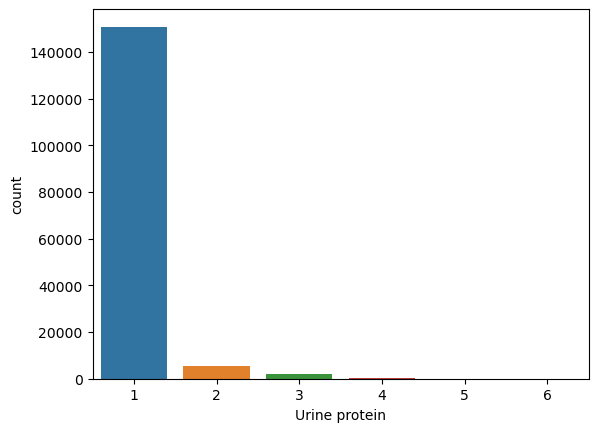

/Users/lakshmanv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


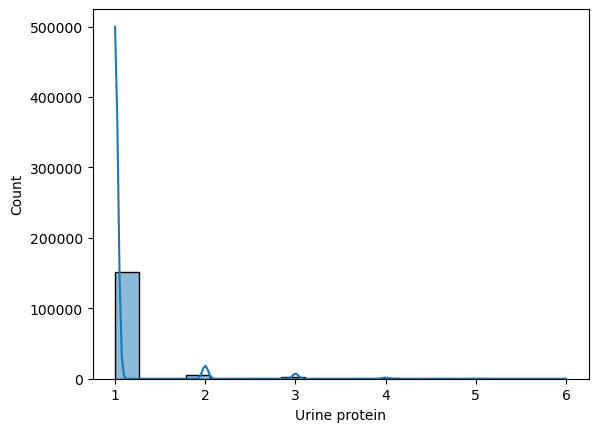

In [3]:

# Example plots
sns.countplot(x='Urine protein', data=train_data)
plt.show()

sns.histplot(train_data['Urine protein'], kde=True)
plt.show()

In [4]:
cont_features = ['age', 'height(cm)','weight(kg)','waist(cm)','eyesight(left)',
                 'eyesight(right)','systolic','relaxation','fasting blood sugar',
                 'Cholesterol','triglyceride','HDL','LDL','hemoglobin', 
                'serum creatinine','AST','ALT','Gtp']
imp = impute.SimpleImputer()
tmp1 = imp.fit_transform(train_data[cont_features])
tmp1 = pd.DataFrame(tmp1, columns = cont_features)
tmp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  float64
 1   height(cm)           159256 non-null  float64
 2   weight(kg)           159256 non-null  float64
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   systolic             159256 non-null  float64
 7   relaxation           159256 non-null  float64
 8   fasting blood sugar  159256 non-null  float64
 9   Cholesterol          159256 non-null  float64
 10  triglyceride         159256 non-null  float64
 11  HDL                  159256 non-null  float64
 12  LDL                  159256 non-null  float64
 13  hemoglobin           159256 non-null  float64
 14  serum creatinine     159256 non-null  float64
 15  AST              

In [5]:
cat_features = ['hearing(left)','hearing(right)','Urine protein','dental caries']

ohe = preprocessing.OneHotEncoder(sparse_output=False)
tmp = ohe.fit_transform(train_data[cat_features])
tmp2 = pd.DataFrame(tmp, columns = ohe.get_feature_names_out(cat_features))
tmp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hearing(left)_1   159256 non-null  float64
 1   hearing(left)_2   159256 non-null  float64
 2   hearing(right)_1  159256 non-null  float64
 3   hearing(right)_2  159256 non-null  float64
 4   Urine protein_1   159256 non-null  float64
 5   Urine protein_2   159256 non-null  float64
 6   Urine protein_3   159256 non-null  float64
 7   Urine protein_4   159256 non-null  float64
 8   Urine protein_5   159256 non-null  float64
 9   Urine protein_6   159256 non-null  float64
 10  dental caries_0   159256 non-null  float64
 11  dental caries_1   159256 non-null  float64
dtypes: float64(12)
memory usage: 14.6 MB


In [6]:
train_data_1 = pd.concat([tmp1, tmp2], axis=1)
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  float64
 1   height(cm)           159256 non-null  float64
 2   weight(kg)           159256 non-null  float64
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   systolic             159256 non-null  float64
 7   relaxation           159256 non-null  float64
 8   fasting blood sugar  159256 non-null  float64
 9   Cholesterol          159256 non-null  float64
 10  triglyceride         159256 non-null  float64
 11  HDL                  159256 non-null  float64
 12  LDL                  159256 non-null  float64
 13  hemoglobin           159256 non-null  float64
 14  serum creatinine     159256 non-null  float64
 15  AST              

In [7]:
### first step of feature selection is to remove zero variance features
vt = feature_selection.VarianceThreshold()
vt.fit(train_data_1)
print(vt.variances_)
res = vt.transform(train_data_1)
print(res.shape)


[6.50000000e+01 5.50000000e+01 1.00000000e+02 7.60000000e+01
 1.61693537e-01 1.53897211e-01 1.36000000e+02 8.09030711e+01
 2.34999458e+02 3.16000000e+02 7.58000000e+02 1.27000000e+02
 7.92920439e+02 2.04835801e+00 3.21647694e-02 8.95834302e+01
 3.15169520e+02 9.73723611e+02 2.33992273e-02 2.33992273e-02
 2.28728471e-02 2.28728471e-02 4.99295002e-02 3.39795731e-02
 1.37943321e-02 2.98620649e-03 4.64444763e-04 3.76737702e-05
 1.58793391e-01 1.58793391e-01]
(159256, 30)


In [8]:
##### Method-1: statstical feature selection

ss = feature_selection.SelectKBest(k = 5)
ss.fit(train_data_1, train_data['smoking'])
print(train_data_1.columns)
print(ss.scores_)
res = ss.transform(train_data_1)
res = pd.DataFrame(res, columns = ss.get_feature_names_out(train_data_1.columns))
res.info()

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'hearing(left)_1',
       'hearing(left)_2', 'hearing(right)_1', 'hearing(right)_2',
       'Urine protein_1', 'Urine protein_2', 'Urine protein_3',
       'Urine protein_4', 'Urine protein_5', 'Urine protein_6',
       'dental caries_0', 'dental caries_1'],
      dtype='object')
[7.05995768e+03 3.97906831e+04 2.24860783e+04 1.18064306e+04
 1.62228999e+03 1.94272863e+03 5.49540128e+02 1.93270452e+03
 1.49803145e+03 4.30061218e+02 1.97248008e+04 1.26414780e+04
 8.36501223e+02 4.05907089e+04 1.28226958e+04 5.63778549e+02
 4.34758556e+03 1.64004220e+04 2.32959894e+02 2.32959894e+02
 2.16638889e+02 2.16638889e+02 1.65773894e+02 1.16174332e+02
 4.07750290e+01 2.96360516e+00 2.22586144e+00 4.66436099e+00
 1.83175253e+03 1.83175253e+03

<Axes: >

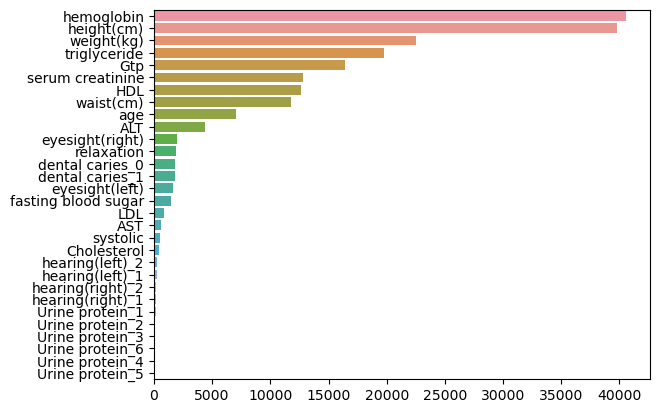

In [9]:
sort_idx = ss.scores_.argsort()[::-1]
sns.barplot(x=ss.scores_[sort_idx], y = train_data_1.columns[sort_idx])

In [10]:
### method -2 : Use a ML algorithm for the feature selection.
### here we are using RF algo. but it is just for illustration purpose. It is not a good algo to use.

In [31]:
rf = ensemble.RandomForestClassifier()
rf_grid  = {'max_depth':[1,5,9], 'n_estimators':[100] }
cv = model_selection.KFold(n_splits=10)
clf = model_selection.GridSearchCV(rf, rf_grid, cv=cv, scoring='accuracy',return_train_score=True)
clf.fit(train_data_1, train_data['smoking'])

embedded_selector = feature_selection.SelectFromModel(clf.best_estimator_, prefit=True, threshold=0.03)
train_data_2 = embedded_selector.fit_transform(train_data_1)
print(embedded_selector.estimator.feature_importances_)
print(embedded_selector.get_support())
print(train_data_1.columns[embedded_selector.get_support()])
print(train_data_2.shape)

[3.90106323e-02 2.69191983e-01 6.89615723e-02 1.50264064e-02
 3.95255354e-03 3.24649541e-03 4.68264761e-03 4.10928660e-03
 5.32833846e-03 1.05088062e-02 9.27718284e-02 2.29043498e-02
 1.40632674e-02 1.96456315e-01 6.07382956e-02 6.58041159e-03
 1.38633277e-02 1.59089563e-01 1.82406640e-04 1.63689724e-04
 2.20579158e-04 2.03087622e-04 1.63842340e-04 2.15220724e-04
 1.02977060e-04 5.22135764e-05 1.30068213e-05 7.76277535e-08
 3.16784648e-03 5.02897255e-03]
[ True  True  True False False False False False False False  True False
 False  True  True False False  True False False False False False False
 False False False False False False]
Index(['age', 'height(cm)', 'weight(kg)', 'triglyceride', 'hemoglobin',
       'serum creatinine', 'Gtp'],
      dtype='object')
(159256, 7)


<Axes: >

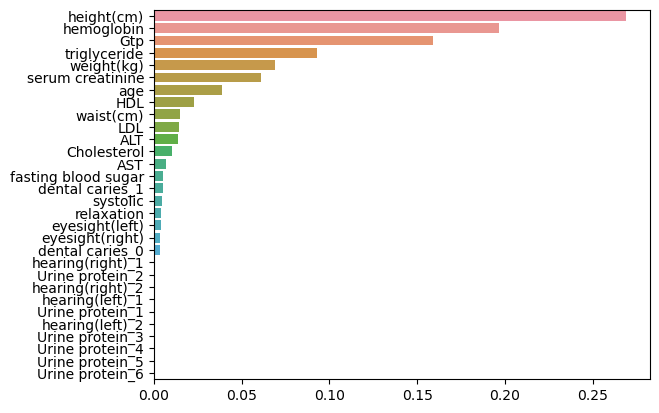

In [32]:
imp = embedded_selector.estimator.feature_importances_
sort_idx = imp.argsort()[::-1]
sns.barplot(x=imp[sort_idx], y = train_data_1.columns[sort_idx])